In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
hospinfo = pd.read_csv(r"D:\DA Projects\Python\HospInfo.csv")
hospinfo

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n"
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n"
2,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"209 NORTH MAIN STREET\nWEDOWEE, AL\n"
3,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,Government - Local,...,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Below the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"508 GREEN STREET\nGREENSBORO, AL\n"
4,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,450617,CLEAR LAKE REGIONAL MEDICAL CENTER,500 MEDICAL CENTER BLVD,WEBSTER,TX,77598,HARRIS,2813322511,Acute Care Hospitals,Proprietary,...,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"500 MEDICAL CENTER BLVD\nWEBSTER, TX\n(29.5410..."
4808,520194,ORTHOPAEDIC HOSPITAL OF WISCONSIN,475 W RIVER WOODS PKWY,GLENDALE,WI,53212,MILWAUKEE,4149616800,Acute Care Hospitals,Voluntary non-profit - Other,...,Results are not available for this reporting p...,Above the national average,NaN,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,"475 W RIVER WOODS PKWY\nGLENDALE, WI\n(43.0982..."
4809,491302,CARILION GILES COMMUNITY HOSPITAL,159 HARTLEY WAY,PEARISBURG,VA,24134,GILES,5409216000,Critical Access Hospitals,Voluntary non-profit - Private,...,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"159 HARTLEY WAY\nPEARISBURG, VA\n(37.332697, -..."
4810,510012,PLEASANT VALLEY HOSPITAL,2520 VALLEY DRIVE,POINT PLEASANT,WV,25550,MASON,3046754340,Acute Care Hospitals,Voluntary non-profit - Private,...,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"2520 VALLEY DRIVE\nPOINT PLEASANT, WV\n(38.868..."


In [4]:
hospinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 29 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Provider ID                                                    4812 non-null   int64 
 1   Hospital Name                                                  4812 non-null   object
 2   Address                                                        4812 non-null   object
 3   City                                                           4812 non-null   object
 4   State                                                          4812 non-null   object
 5   ZIP Code                                                       4812 non-null   int64 
 6   County Name                                                    4797 non-null   object
 7   Phone Number                                                   4812 n

In [5]:
hospinfo['Hospital Name'] = hospinfo['Hospital Name'].str.strip().str.title()
hospinfo['City'] = hospinfo['City'].str.strip().str.title()

In [6]:
hospinfo.isnull().sum()

Provider ID                                                         0
Hospital Name                                                       0
Address                                                             0
City                                                                0
State                                                               0
ZIP Code                                                            0
County Name                                                        15
Phone Number                                                        0
Hospital Type                                                       0
Hospital Ownership                                                  0
Emergency Services                                                  0
Meets criteria for meaningful use of EHRs                         144
Hospital overall rating                                             0
Hospital overall rating footnote                                 3414
Mortality national c

In [7]:
hospinfo.duplicated().sum()
hospinfo.drop_duplicates(inplace= True)

In [8]:
hospinfo['Phone Number'] = hospinfo['Phone Number'].astype(str)
hospinfo['Phone Number'] = hospinfo['Phone Number'].str.replace(r'\D', '', regex = True)

In [9]:
def assign_beds(Hospital_Type):
    if Hospital_Type == 'Critical Access Hospitals':
        return 30
    elif Hospital_Type == 'Acute Care Hospitals':
        return 200
    else:
        return 100

hospinfo['Beds'] = hospinfo['Hospital Type'].apply(assign_beds)

In [10]:
def bed_category(Beds):
    if Beds < 50 :
        return 'Small'
    elif Beds <= 100 :
        return 'Medium'
    else:
        return 'Large'

hospinfo['Bed_Category'] = hospinfo['Beds'].apply(bed_category)
hospinfo

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location,Beds,Bed_Category
0,10005,Marshall Medical Center South,2505 U S HIGHWAY 431 NORTH,Boaz,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n",200,Large
1,10012,Dekalb Regional Medical Center,200 MED CENTER DRIVE,Fort Payne,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n",200,Large
2,10032,Wedowee Hospital,209 NORTH MAIN STREET,Wedowee,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,...,Results are not available for this reporting p...,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"209 NORTH MAIN STREET\nWEDOWEE, AL\n",200,Large
3,10095,Hale County Hospital,508 GREEN STREET,Greensboro,AL,36744,HALE,3346243024,Acute Care Hospitals,Government - Local,...,Results are not available for this reporting p...,Below the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"508 GREEN STREET\nGREENSBORO, AL\n",200,Large
4,10131,Crestwood Medical Center,ONE HOSPITAL DR SE,Huntsville,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n",200,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,450617,Clear Lake Regional Medical Center,500 MEDICAL CENTER BLVD,Webster,TX,77598,HARRIS,2813322511,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"500 MEDICAL CENTER BLVD\nWEBSTER, TX\n(29.5410...",200,Large
4808,520194,Orthopaedic Hospital Of Wisconsin,475 W RIVER WOODS PKWY,Glendale,WI,53212,MILWAUKEE,4149616800,Acute Care Hospitals,Voluntary non-profit - Other,...,NaN,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,"475 W RIVER WOODS PKWY\nGLENDALE, WI\n(43.0982...",200,Large
4809,491302,Carilion Giles Community Hospital,159 HARTLEY WAY,Pearisburg,VA,24134,GILES,5409216000,Critical Access Hospitals,Voluntary non-profit - Private,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"159 HARTLEY WAY\nPEARISBURG, VA\n(37.332697, -...",30,Small
4810,510012,Pleasant Valley Hospital,2520 VALLEY DRIVE,Point Pleasant,WV,25550,MASON,3046754340,Acute Care Hospitals,Voluntary non-profit - Private,...,NaN,Below the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"2520 VALLEY DRIVE\nPOINT PLEASANT, WV\n(38.868...",200,Large


In [11]:
city_metrics = hospinfo.groupby('City').agg(
    total_hospitals = ('Hospital Name', 'count'),
    total_beds = ('Beds', 'sum'),
    average_beds = ('Beds', 'mean'),
)

city_metrics['bed_to_hospital_ratio'] = city_metrics['total_beds'] / city_metrics['total_hospitals']
city_metrics = city_metrics.reset_index()
city_metrics

,City,total_hospitals,total_beds,average_beds,bed_to_hospital_ratio
0,Abbeville,2,230,115.000000,115.000000
1,Aberdeen,4,630,157.500000,157.500000
2,Abilene,3,430,143.333333,143.333333
3,Abingdon,1,200,200.000000,200.000000
4,Abington,1,200,200.000000,200.000000
...,...,...,...,...,...
2942,Zanesville,1,200,200.000000,200.000000
2943,Zeeland,1,200,200.000000,200.000000
2944,Zephyrhills,1,200,200.000000,200.000000
2945,Zion,1,200,200.000000,200.000000


In [12]:
city_metrics.sort_values('bed_to_hospital_ratio', ascending= True).head(10)

,City,total_hospitals,total_beds,average_beds,bed_to_hospital_ratio
2930,Yazoo City,1,30,30.0,30.0
2900,Wishek,1,30,30.0,30.0
2901,Wolf Point,1,30,30.0,30.0
1250,Ishpeming,1,30,30.0,30.0
1270,Jerome,1,30,30.0,30.0
1272,Jersey Shore,1,30,30.0,30.0
1275,Jetmore,1,30,30.0,30.0
1276,John Day,1,30,30.0,30.0
1278,Johnson,1,30,30.0,30.0
1263,Jefferson,2,60,30.0,30.0


In [13]:
top10_shortage = city_metrics[
    city_metrics['total_hospitals'] >= 3
].sort_values('bed_to_hospital_ratio').head(10)

top10_shortage

,City,total_hospitals,total_beds,average_beds,bed_to_hospital_ratio
2562,Superior,3,90,30.000000,30.000000
2222,Ripley,3,90,30.000000,30.000000
1946,Osceola,4,120,30.000000,30.000000
2158,Quitman,3,90,30.000000,30.000000
2790,Waverly,3,90,30.000000,30.000000
1741,Morton,3,90,30.000000,30.000000
1722,Monticello,8,410,51.250000,51.250000
408,Carthage,6,350,58.333333,58.333333
1046,Greensburg,5,320,64.000000,64.000000
834,Fairfax,4,290,72.500000,72.500000


In [14]:
contact_status = hospinfo.copy()
contact_status['contact_missing'] = contact_status['Phone Number'].isnull()

contact_city = contact_status.groupby('City').agg(total_hospitals = ('Hospital Name', 'count'), missing_contact = ('contact_missing', 'sum'))

contact_city['complete_contacts'] = contact_city['total_hospitals'] - contact_city['missing_contact']

contact_city.sort_values('missing_contact', ascending= False).head(10)

,total_hospitals,missing_contact,complete_contacts
City,,,
Abbeville,2,0,2
Aberdeen,4,0,4
Abilene,3,0,3
Abingdon,1,0,1
Abington,1,0,1
Ackerman,1,0,1
Ada,3,0,3
Addison,1,0,1
Adel,1,0,1


In [15]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of Hospitals')

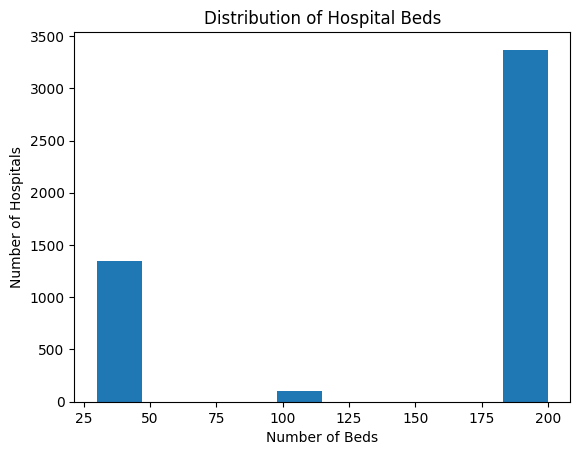

In [16]:
plt.hist(hospinfo['Beds'], bins= 10)
plt.title("Distribution of Hospital Beds")
plt.xlabel("Number of Beds")
plt.ylabel("Number of Hospitals")

In [17]:
city_metrics[['City', 'total_beds']].sort_values('total_beds', ascending= False).head(10)

,City,total_beds
463,Chicago,5500
1206,Houston,5300
1503,Los Angeles,3800
2045,Philadelphia,3500
626,Dallas,3430
140,Baltimore,3200
1906,Oklahoma City,3200
2050,Phoenix,3000
531,Columbus,2820
1255,Jackson,2690


In [18]:
city_metrics[['City', 'total_beds']].sort_values('total_beds', ascending= True).head(10)

,City,total_beds
986,Glencoe,30
2907,Woodland Park,30
2902,Wolfeboro,30
2901,Wolf Point,30
2900,Wishek,30
2898,Winterset,30
2897,Winters,30
2921,Wynne,30
2919,Wray,30
2918,Wrangell,30


In [19]:
city_metrics

,City,total_hospitals,total_beds,average_beds,bed_to_hospital_ratio
0,Abbeville,2,230,115.000000,115.000000
1,Aberdeen,4,630,157.500000,157.500000
2,Abilene,3,430,143.333333,143.333333
3,Abingdon,1,200,200.000000,200.000000
4,Abington,1,200,200.000000,200.000000
...,...,...,...,...,...
2942,Zanesville,1,200,200.000000,200.000000
2943,Zeeland,1,200,200.000000,200.000000
2944,Zephyrhills,1,200,200.000000,200.000000
2945,Zion,1,200,200.000000,200.000000


In [20]:
largerhoapital = city_metrics[['City', 'average_beds']].sort_values('average_beds', ascending= False).head(10)
largerhoapital

,City,average_beds
2946,Zuni,200.0
2945,Zion,200.0
2929,Yauco,200.0
2928,Yankton,200.0
2927,Yakima,200.0
2926,Xenia,200.0
2925,Wytheville,200.0
2924,Wyomissing,200.0
2923,Wyoming,200.0
2922,Wynnewood,200.0


In [21]:
smallerhospital = city_metrics[['City', 'average_beds']].sort_values('average_beds').head(10)
smallerhospital

,City,average_beds
2930,Yazoo City,30.0
2900,Wishek,30.0
2901,Wolf Point,30.0
1250,Ishpeming,30.0
1270,Jerome,30.0
1272,Jersey Shore,30.0
1275,Jetmore,30.0
1276,John Day,30.0
1278,Johnson,30.0
1263,Jefferson,30.0


In [26]:
critical_cities = city_metrics[city_metrics['total_hospitals'] >= 3].sort_values('bed_to_hospital_ratio').head(10)
critical_cities

,City,total_hospitals,total_beds,average_beds,bed_to_hospital_ratio
2562,Superior,3,90,30.000000,30.000000
2222,Ripley,3,90,30.000000,30.000000
1946,Osceola,4,120,30.000000,30.000000
2158,Quitman,3,90,30.000000,30.000000
2790,Waverly,3,90,30.000000,30.000000
1741,Morton,3,90,30.000000,30.000000
1722,Monticello,8,410,51.250000,51.250000
408,Carthage,6,350,58.333333,58.333333
1046,Greensburg,5,320,64.000000,64.000000
834,Fairfax,4,290,72.500000,72.500000


In [28]:
bed_comparison = hospinfo.groupby('Hospital Ownership')['Beds'].mean().reset_index()
bed_comparison

,Hospital Ownership,Beds
0,Government - Federal,169.777778
1,Government - Hospital District or Authority,112.852050
2,Government - Local,103.513514
3,Government - State,164.000000
4,Physician,192.500000
5,Proprietary,184.762500
6,Tribal,124.444444
7,Voluntary non-profit - Church,167.988338
8,Voluntary non-profit - Other,164.523810
9,Voluntary non-profit - Private,148.455166


In [29]:
city_metrics.sort_values('total_beds', ascending= False).head(10)

,City,total_hospitals,total_beds,average_beds,bed_to_hospital_ratio
463,Chicago,29,5500,189.655172,189.655172
1206,Houston,28,5300,189.285714,189.285714
1503,Los Angeles,20,3800,190.000000,190.000000
2045,Philadelphia,19,3500,184.210526,184.210526
626,Dallas,19,3430,180.526316,180.526316
140,Baltimore,17,3200,188.235294,188.235294
1906,Oklahoma City,16,3200,200.000000,200.000000
2050,Phoenix,16,3000,187.500000,187.500000
531,Columbus,18,2820,156.666667,156.666667
1255,Jackson,16,2690,168.125000,168.125000


In [31]:
overburdened = city_metrics.sort_values('total_beds', ascending= False).head(10)
overburdened

,City,total_hospitals,total_beds,average_beds,bed_to_hospital_ratio
463,Chicago,29,5500,189.655172,189.655172
1206,Houston,28,5300,189.285714,189.285714
1503,Los Angeles,20,3800,190.000000,190.000000
2045,Philadelphia,19,3500,184.210526,184.210526
626,Dallas,19,3430,180.526316,180.526316
140,Baltimore,17,3200,188.235294,188.235294
1906,Oklahoma City,16,3200,200.000000,200.000000
2050,Phoenix,16,3000,187.500000,187.500000
531,Columbus,18,2820,156.666667,156.666667
1255,Jackson,16,2690,168.125000,168.125000


In [32]:
hospinfo

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location,Beds,Bed_Category
0,10005,Marshall Medical Center South,2505 U S HIGHWAY 431 NORTH,Boaz,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n",200,Large
1,10012,Dekalb Regional Medical Center,200 MED CENTER DRIVE,Fort Payne,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n",200,Large
2,10032,Wedowee Hospital,209 NORTH MAIN STREET,Wedowee,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,...,Results are not available for this reporting p...,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"209 NORTH MAIN STREET\nWEDOWEE, AL\n",200,Large
3,10095,Hale County Hospital,508 GREEN STREET,Greensboro,AL,36744,HALE,3346243024,Acute Care Hospitals,Government - Local,...,Results are not available for this reporting p...,Below the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"508 GREEN STREET\nGREENSBORO, AL\n",200,Large
4,10131,Crestwood Medical Center,ONE HOSPITAL DR SE,Huntsville,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n",200,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,450617,Clear Lake Regional Medical Center,500 MEDICAL CENTER BLVD,Webster,TX,77598,HARRIS,2813322511,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"500 MEDICAL CENTER BLVD\nWEBSTER, TX\n(29.5410...",200,Large
4808,520194,Orthopaedic Hospital Of Wisconsin,475 W RIVER WOODS PKWY,Glendale,WI,53212,MILWAUKEE,4149616800,Acute Care Hospitals,Voluntary non-profit - Other,...,NaN,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,"475 W RIVER WOODS PKWY\nGLENDALE, WI\n(43.0982...",200,Large
4809,491302,Carilion Giles Community Hospital,159 HARTLEY WAY,Pearisburg,VA,24134,GILES,5409216000,Critical Access Hospitals,Voluntary non-profit - Private,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"159 HARTLEY WAY\nPEARISBURG, VA\n(37.332697, -...",30,Small
4810,510012,Pleasant Valley Hospital,2520 VALLEY DRIVE,Point Pleasant,WV,25550,MASON,3046754340,Acute Care Hospitals,Voluntary non-profit - Private,...,NaN,Below the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"2520 VALLEY DRIVE\nPOINT PLEASANT, WV\n(38.868...",200,Large


In [36]:
bed_category_city = pd.crosstab(hospinfo['City'], hospinfo['Bed_Category'])
bed_category_city.head()

Bed_Category,Large,Medium,Small
City,,,
Abbeville,1,0,1
Aberdeen,3,0,1
Abilene,2,0,1
Abingdon,1,0,0
Abington,1,0,0


In [38]:
large_hospitals = bed_category_city.sort_values('Large', ascending= False).head(10)
large_hospitals

Bed_Category,Large,Medium,Small
City,,,
Chicago,26,3,0
Houston,25,3,0
Los Angeles,18,2,0
Philadelphia,16,3,0
Dallas,16,2,1
Oklahoma City,16,0,0
Baltimore,15,2,0
Phoenix,14,2,0
Columbus,13,1,4


In [39]:
small_hospitals = bed_category_city.sort_values('Small', ascending= False).head(10)
small_hospitals

Bed_Category,Large,Medium,Small
City,,,
Monticello,1,0,7
Salem,5,0,5
Carthage,1,0,5
Franklin,6,0,5
Madison,4,0,5
Hillsboro,3,0,5
Columbus,13,1,4
Springfield,11,1,4
Osceola,0,0,4


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Chicago'),
  Text(1, 0, 'Houston'),
  Text(2, 0, 'Los Angeles'),
  Text(3, 0, 'Philadelphia'),
  Text(4, 0, 'Dallas'),
  Text(5, 0, 'Baltimore'),
  Text(6, 0, 'Oklahoma City'),
  Text(7, 0, 'Phoenix'),
  Text(8, 0, 'Columbus'),
  Text(9, 0, 'Jackson')])

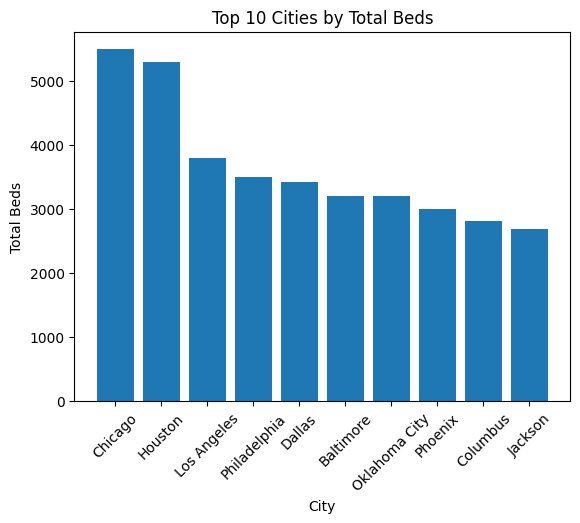

In [45]:
top_cities = city_metrics.sort_values('total_beds', ascending= False).head(10)

plt.bar(top_cities['City'], top_cities['total_beds'])
plt.title('Top 10 Cities by Total Beds')
plt.xlabel('City')
plt.ylabel('Total Beds')
plt.xticks(rotation=45)

Text(0, 0.5, 'Beds per Hospital')

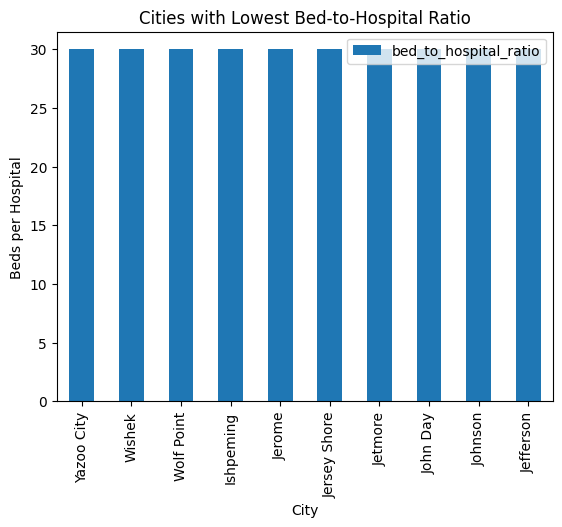

In [46]:
city_metrics.sort_values('bed_to_hospital_ratio').head(10).plot(
    x='City',
    y='bed_to_hospital_ratio',
    kind='bar',
    title='Cities with Lowest Bed-to-Hospital Ratio'
)
plt.xlabel('City')
plt.ylabel('Beds per Hospital')

Text(0, 0.5, 'Number of Hospitals')

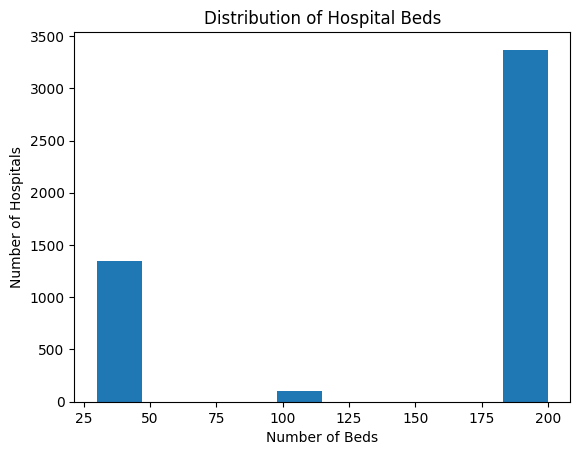

In [47]:
plt.hist(hospinfo['Beds'], bins=10)
plt.title('Distribution of Hospital Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Number of Hospitals')

Text(0, 0.5, 'Average Beds')

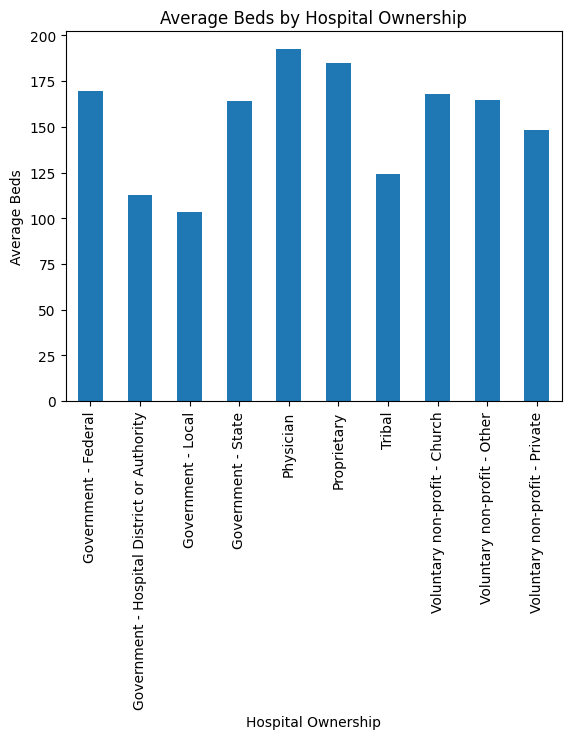

In [48]:
ownership_beds = hospinfo.groupby('Hospital Ownership')['Beds'].mean()

ownership_beds.plot(kind='bar', title='Average Beds by Hospital Ownership')
plt.xlabel('Hospital Ownership')
plt.ylabel('Average Beds')

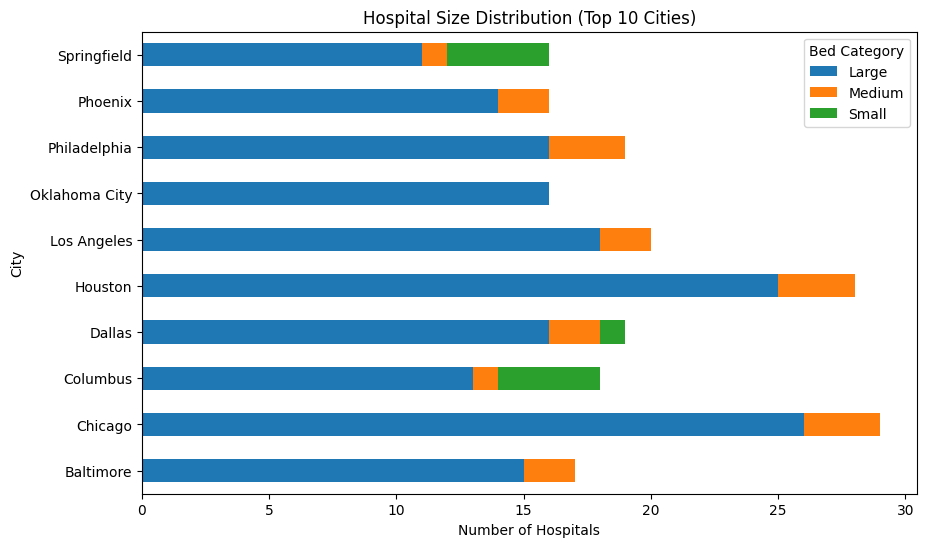

In [52]:
top_cities = hospinfo['City'].value_counts().head(10).index

clean_data = hospinfo[hospinfo['City'].isin(top_cities)]

bed_category_city_clean = pd.crosstab(
    clean_data['City'],
    clean_data['Bed_Category']
)

bed_category_city_clean.plot(
    kind='barh',
    stacked=True,
    figsize=(10,6),
    title='Hospital Size Distribution (Top 10 Cities)'
)

plt.xlabel('Number of Hospitals')
plt.ylabel('City')
plt.legend(title='Bed Category')

In [53]:
hospinfo.to_csv(r"D:\DA Projects\Python\cleaned_hospital_data.csv", index= False)

In [54]:
city_metrics.to_csv(r"D:\DA Projects\Python\city_level_healthcare_metrics.csv", index= False)